# Logistic Regression

This exercise will solve two exercises involving Logistic Regression. 

In the first one, we will train a model to predict if a student gets admitted into a university based on the results of two exams. On the second one, we will predict wheter microchips from a fabrication plant passes quality assurance based on two test results. In this case, we will use a regularized logistic regression.

# Non Regularized Logistic Regression

The data contain three columns: the first and the second will create the X matrix and the third the Y matrix.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('ex2data1.txt', sep=",", names=['Exam_1', 'Exam_2', 'admission'])
data.head()

,Exam_1,Exam_2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


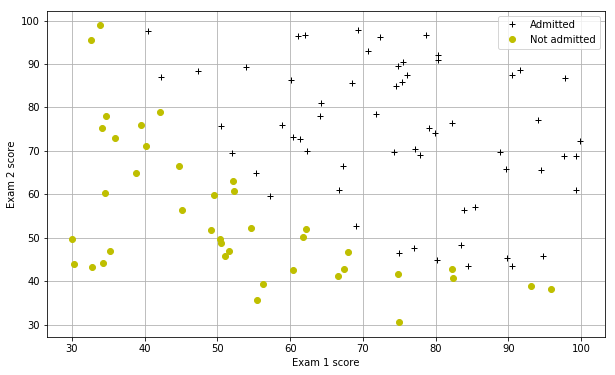

In [3]:
def plotData(pos, neg):
    plt.figure(figsize=(10,6))
    plt.plot(pos['Exam_1'],pos['Exam_2'],'k+',label='Admitted')
    plt.plot(neg['Exam_1'],neg['Exam_2'],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)

pos = data[data['admission'] == 1][['Exam_1', 'Exam_2']]
neg = data[data['admission'] == 0][['Exam_1', 'Exam_2']]

plotData(pos, neg)

In using sklearn, the default is passing a C parameter (that is 1/lambda, the parameter of regularization). To remove regularization, we simply define C as a big value (when lambda is 0, C tends to infinite)

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e49)

In [5]:
x = np.array(data[['Exam_1', 'Exam_2']])
y = np.array(data[['admission']])
y = np.squeeze(y)

lr.fit(x, y)

LogisticRegression(C=1e+49, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
theta0 = lr.intercept_[0]
theta1 = lr.coef_[:,0][0]
theta2 = lr.coef_[:,1][0]

print('Theta 0 is {}, Theta 1 is {} and Theta 2 is {}'.format(theta0, theta1, theta2))
print('The prediction accuracy is {} %'.format(lr.score(x,y) * 100))


Theta 0 is -24.956046473822713, Theta 1 is 0.2045900794398586 and Theta 2 is 0.19981008739574788
The prediction accuracy is 89.0 %


In [13]:
student_1 = np.array([45, 85]).reshape(1,2)
prediction1 = round(lr.predict_proba(student_1)[0][1] * 100, 2)
print('For a student with scores 45 and 85, we predict an admission probability of {} %'.format(prediction1))

For a student with scores 45 and 85, we predict an admission probability of 77.46 %


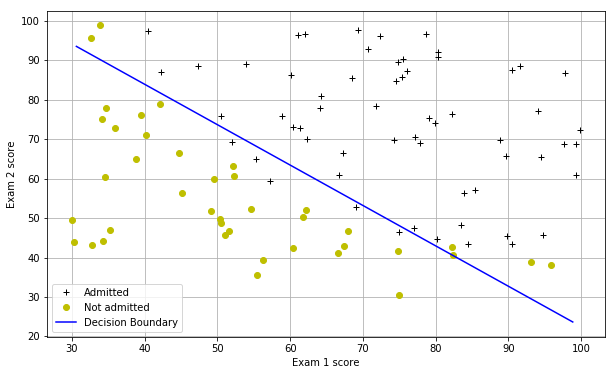

In [16]:
x1 = np.linspace(30,100, 1)
x2 = np.linspace(30,100, 1)
yy = []

boundary_xs = np.array([np.min(x[:,1]), np.max(x[:,1])])
boundary_ys = (-1./theta2)*(theta0 + theta1*boundary_xs)
plotData(pos, neg)
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()
plt.show()

# Regularized Logistic Regression

The data contain three columns: the first and the second will create the X matrix and the third the Y matrix.

In [17]:
data = pd.read_csv('ex2data2.txt', sep=",", names=['Test_1', 'Test_2', 'approval'])
data.head()

,Test_1,Test_2,approval
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


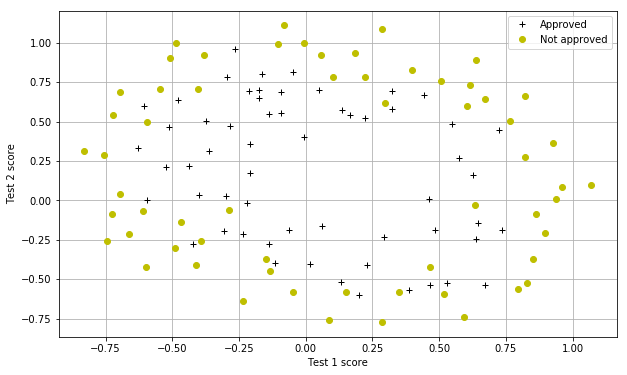

In [18]:
pos = data[data['approval'] == 1][['Test_1', 'Test_2']]
neg = data[data['approval'] == 0][['Test_1', 'Test_2']]

plt.figure(figsize=(10,6))
plt.plot(pos['Test_1'],pos['Test_2'],'k+',label='Approved')
plt.plot(neg['Test_1'],neg['Test_2'],'yo',label='Not approved')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.legend()
plt.grid(True)

As we see in the figure, the data are not linearly separable, so we will need to use a regularized logistic regression with more features. We will first create more features to contain the combinations of test_1^n * test_2^n for n from 0 to 6.

After, we will test three values of lambda: 0 (C = 1e49), 1 (C = 1), and 100 (C = 0.01).

In [53]:
ex1 = np.linspace(-1, 1, 100)
ex2 = np.linspace(-1, 1, 100)
a = ex1[1]
b = ex2[1]
c = pd.DataFrame('Test1'=a, 'Test2'=b)
#c = np.array([a,b]).reshape(1,-1)
#lr2.predict(c)

SyntaxError: keyword can't be an expression (<ipython-input-53-f764f0e77a55>, line 5)

In [50]:
def create_features(df):
    for i in range(0,7):
        for j in range(0,7):
            name = str(i) + '-' + str(j)
            df[name] = (df['Test_1'] ** i) * (df['Test_2'] ** j)
    return df

data = create_features(data)  
data.head()

,Test_1,Test_2,approval,0-0,0-1,0-2,0-3,0-4,0-5,0-6,...,5-4,5-5,5-6,6-0,6-1,6-2,6-3,6-4,6-5,6-6
0,0.051267,0.69956,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,...,8.481827e-08,5.933547e-08,4.150872e-08,1.815630e-08,1.270142e-08,8.885408e-09,6.215876e-09,4.348378e-09,3.041951e-09,2.128028e-09
1,-0.092742,0.68494,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,...,-1.510054e-06,-1.034296e-06,-7.084308e-07,6.362953e-07,4.358241e-07,2.985134e-07,2.044638e-07,1.400454e-07,9.592270e-08,6.570129e-08
2,-0.213710,0.69225,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,...,-1.023708e-04,-7.086618e-05,-4.905712e-05,9.526844e-05,6.594958e-05,4.565360e-05,3.160370e-05,2.187766e-05,1.514481e-05,1.048400e-05
3,-0.375000,0.50219,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,...,-4.716595e-04,-2.368627e-04,-1.189501e-04,2.780914e-03,1.396547e-03,7.013321e-04,3.522020e-04,1.768723e-04,8.882351e-05,4.460628e-05
4,-0.513250,0.46564,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,...,-1.674349e-03,-7.796437e-04,-3.630333e-04,1.827990e-02,8.511851e-03,3.963458e-03,1.845545e-03,8.593595e-04,4.001521e-04,1.863268e-04


In [22]:
data.columns
columns = ['0-0', '0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '1-0', '1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '2-0',
           '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '3-0', '3-1', '3-2', '3-3', '3-4', '3-5', '3-6', '4-0', '4-1', '4-2', 
           '4-3', '4-4', '4-5', '4-6','5-0', '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '6-0', '6-1', '6-2', '6-3', '6-4', 
           '6-5', '6-6']

x = np.array(data[columns])
y = np.array(data[['approval']])
y = np.squeeze(y)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression as expit

def thetaFunc(y, theta, x):

    deg = 6

    spot = 0
    sum = theta[spot]

    spot += 1
    for i in range(1, deg + 1):
        for j in range(i + 1):
            sum += theta[spot] * x**(i - j) * y**(j)
            spot += 1
    return np.exp(-sum)


def constructVariations(X, deg):

    features = np.zeros((len(X), 27)) 
    spot = 0

    for i in range(1, deg + 1):
        for j in range(i + 1):

            features[:, spot] = X[:,0]**(i - j) * X[:,1]**(j)
            spot += 1

    return features

if __name__ == '__main__':
    data = np.loadtxt("ex2points.txt", delimiter = ",")
    X,Y = np.split(data, [len(data[0,:]) - 1], 1)

    X = constructVariations(X, 6)
    rawX = np.copy(X)

    oneArray = np.ones((len(X),1))
    X = np.hstack((oneArray, X))
    trial = expit(solver = 'sag')
    trial = trial.fit(X = X,y = np.ravel(Y))

    from matplotlib import pyplot as plt

    theta = trial.coef_.ravel()

    x = np.linspace(-1, 1.5, 100)
    y = np.linspace(-1,1.5,100)
    z = np.empty((100,100))


    xx,yy = np.meshgrid(x,y)
    for i in range(len(x)):
         for j in range(len(y)):
             z[i][j] = thetaFunc(yy[i][j], theta, xx[i][j])
    z -= trial.intercept_

    plt.contour(xx,yy,z > 1,cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(rawX[:, 0], rawX[:, 1], c=Y, linewidth=0, s=50)
    plt.show()

In [37]:
xx,yy = np.meshgrid(x, y)
xx1 = np.linspace(-1, 1, 100)
xx2 = np.linspace(-1,1,100)
z = np.empty((100,100))

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
c = 1
lr2 = LogisticRegression(C=c)
lr2.fit(x, y)

print('With a c value of {}, the prediction accuracy is {} %'.format(c, round(lr2.score(x,y) * 100,2)))

With a c value of 1, the prediction accuracy is 83.05 %


In [29]:
c = 1e49

lr2 = LogisticRegression(C=c)
lr2.fit(x, y)

print('With a c value of {}, the prediction accuracy is {} %'.format(c, round(lr2.score(x,y) * 100,2)))

With a c value of 1e+49, the prediction accuracy is 94.07 %


In [30]:
c = 0.01

lr2 = LogisticRegression(C=c)
lr2.fit(x, y)

print('With a c value of {}, the prediction accuracy is {} %'.format(c, round(lr2.score(x,y) * 100,2)))

With a c value of 0.01, the prediction accuracy is 61.02 %


It's missing the last part where we will draw contour plots for each value of c/lambda (reference: https://stackoverflow.com/questions/37767759/not-getting-correct-contour-plot-of-coefficients-from-my-logistic-regression-imp)